In [1]:
import pandas as pd

customers = pd.read_csv("/content/drive/MyDrive/datasets/Customers (1).csv")
products = pd.read_csv("/content/drive/MyDrive/datasets/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/datasets/Transactions.csv")


In [3]:
merged = pd.merge(transactions, customers, on="CustomerID")
merged = pd.merge(merged, products, on="ProductID")


In [4]:
# Combine customer and transaction data
customer_transactions = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',  # Total items purchased
    'Region': lambda x: x.mode()[0],  # Most common region
}).reset_index()

# Encode categorical features (e.g., Region)
customer_transactions = pd.get_dummies(customer_transactions, columns=['Region'], drop_first=True)


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Select features for clustering
features = customer_transactions.drop(columns=['CustomerID'])
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to data
customer_transactions['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(features, clusters)
silhouette_avg = silhouette_score(features, clusters)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


Davies-Bouldin Index: 0.5495195333894679
Silhouette Score: 0.5362595693085573


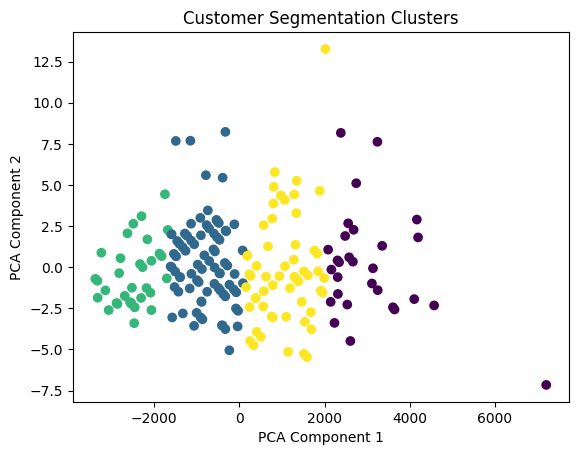

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

plt.scatter(features_2d[:, 0], features_2d[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segmentation Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
